In [2]:
%%markdown
## 5.1.10 Plot Pandas DataFrame and Series

## 5.1.10 Plot Pandas DataFrame and Series


In [3]:
# Set up
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Load CSV
pyber_ride_df=pd.read_csv('Resources/PyBer_ride_data.csv')
pyber_ride_df

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34
5,June,27.04
6,July,43.82
7,Aug,10.56
8,Sept,11.85
9,Oct,27.90


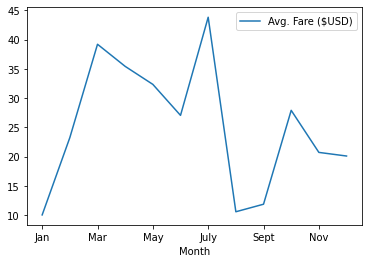

In [4]:
pyber_ride_df.plot(x='Month',y='Avg. Fare ($USD)')
plt.show()

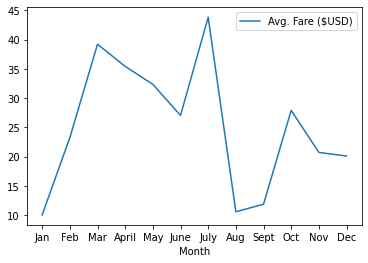

In [5]:
# Set x-axis and tick locations
x_axis=np.arange(len(pyber_ride_df))
tick_locations=[value for value in x_axis]
# Plot the data
pyber_ride_df.plot(x='Month',y='Avg. Fare ($USD)')
plt.xticks(tick_locations,pyber_ride_df['Month'])
plt.show()


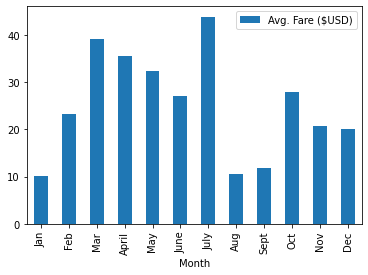

In [6]:
pyber_ride_df.plot.bar(x="Month", y="Avg. Fare ($USD)")
plt.show()

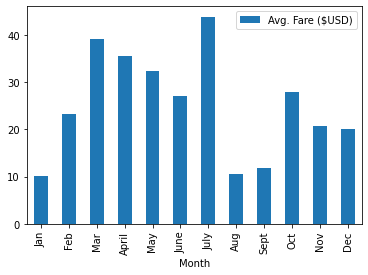

In [7]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)", kind='bar')
plt.show()

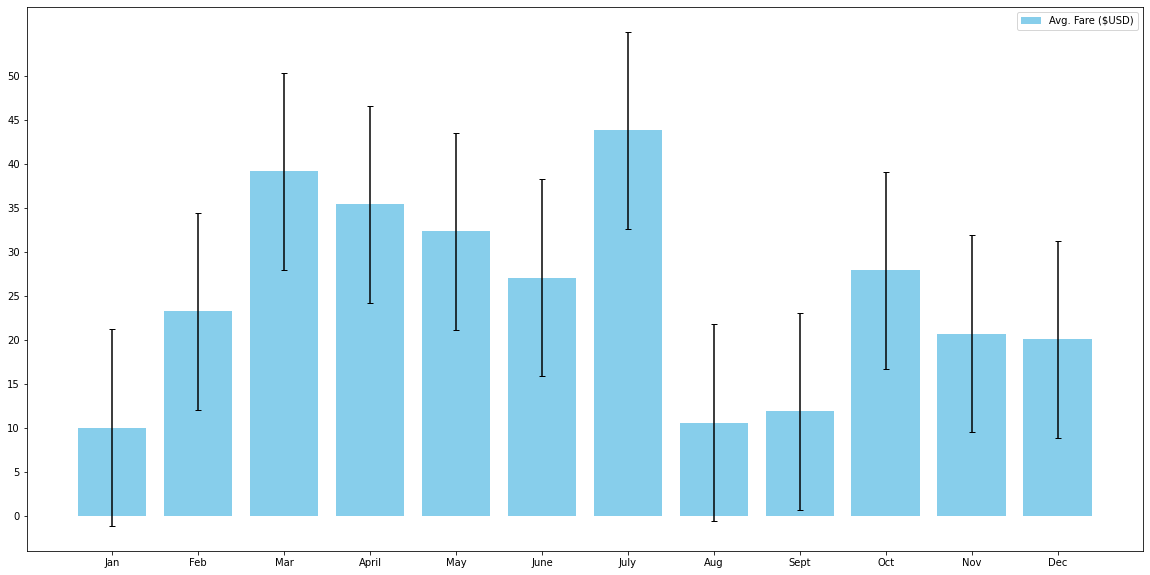

In [8]:
# Skill Drill
# 1.Add error bars.
# 2.Add caps to the error bars.
# 3.Change the color of the bars to sky blue.
# 4.Rotate the labels on the x-axis to horizontal.
# 5.Set the y-axis increment to every $5.
import statistics
x_series=pd.Series(pyber_ride_df["Month"])
y_series=pd.Series(pyber_ride_df["Avg. Fare ($USD)"])
st_dev=statistics.stdev(y_series)
plt.subplots(figsize=(20,10))
plt.yticks(np.arange(0, 51, step=5))
plt.bar(x_series,y_series, yerr=st_dev,capsize=3,color='skyblue',label="Avg. Fare ($USD)")
plt.legend()
plt.show()


In [9]:
%%markdown
# 5.2.3 Load and Read the CSV files

# 5.2.3 Load and Read the CSV files


In [10]:
# Files to load 
city_data_to_load='Resources/city_data.csv'
ride_data_to_load='Resources/ride_data.csv'


In [11]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [12]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [13]:
%%markdown
## Inspect the city data DataFrame

## Inspect the city data DataFrame


In [14]:
%%markdown
### 1.Get all the rows that contain null values.
### 2.Make sure the driver_count column has an integer data type.
### 3.Find out how many data points there are for each type of city.

### 1.Get all the rows that contain null values.
### 2.Make sure the driver_count column has an integer data type.
### 3.Find out how many data points there are for each type of city.


In [15]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [16]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [17]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [18]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [19]:
# Get the number of data points from the Urban,Suburban and Rural cities.
sum_urban=sum(city_data_df["type"]=="Urban")
sum_suburban=sum(city_data_df["type"]=="Suburban")
sum_rural=sum(city_data_df["type"]=="Rural")

print(f'{sum_urban} urban, {sum_suburban} suburban, {sum_rural} rural')

66 urban, 36 suburban, 18 rural


In [20]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [21]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [22]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [23]:
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df,city_data_df,how='left',on=['city','city'])

#Display the dataframe
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [24]:
%%markdown
## 5.3.1 Create DataFrames for each type of city

## 5.3.1 Create DataFrames for each type of city


In [33]:
#Create the Urban,Suburban and Rural cities Data Frames
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [44]:
%%markdown
# 5.3.2 Get the Number of Rides for Each City Type

# 5.3.2 Get the Number of Rides for Each City Type


In [79]:
#Get the number of rides per type and city
urban_ride_count=urban_cities_df.groupby(urban_cities_df['city']).count()['ride_id']

suburban_ride_count=suburban_cities_df.groupby(suburban_cities_df['city']).count()['ride_id']

rural_ride_count=rural_cities_df.groupby(rural_cities_df['city']).count()['ride_id']


In [80]:
%%markdown
# 5.3.3 Get the Average Fare for Each City Type

# 5.3.3 Get the Average Fare for Each City Type


In [81]:
#Get the average fare per type and city
urban_avg_fare=urban_cities_df.groupby(urban_cities_df['city']).mean()['fare']

suburban_avg_fare=suburban_cities_df.groupby(suburban_cities_df['city']).mean()['fare']

rural_avg_fare=rural_cities_df.groupby(rural_cities_df['city']).mean()['fare']


In [53]:
%%markdown
# 5.3.4 Get the Average Number of Drivers for each city type

# 5.3.4 Get the Average Number of Drivers for each city type


In [82]:
#Get the average number of drivers per type and city
urban_driver_count=urban_cities_df.groupby(urban_cities_df['city']).mean()['driver_count']

suburban_driver_count=suburban_cities_df.groupby(suburban_cities_df['city']).mean()['driver_count']

rural_driver_count=rural_cities_df.groupby(rural_cities_df['city']).mean()['driver_count']


In [59]:
%%markdown
# 5.3.5 Create Bubble Chart - 5.3.6 Create Bubble Chart for all cities

# 5.3.5 Create Bubble Chart


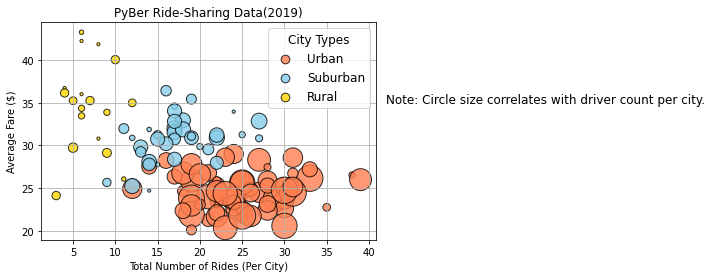

In [94]:
# Uban Chart
plt.scatter(urban_ride_count,urban_avg_fare,s=urban_driver_count*10,c='coral',alpha=0.8,edgecolor="black",linewidths=1,label='Urban')

# Suburban Chart
plt.scatter(suburban_ride_count,suburban_avg_fare,s=suburban_driver_count*10, c="skyblue",edgecolor="black", linewidths=1,alpha=0.8, label="Suburban")

# Scatter Chart
plt.scatter(rural_ride_count,rural_avg_fare,s=rural_driver_count*10, c="gold",edgecolor="black", linewidths=1,alpha=0.8, label="Rural")

# Chart Format
plt.title('PyBer Ride-Sharing Data(2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

#Create a lengend

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")

# Show Graph
plt.show()

In [88]:
%%markdown
- What happended on the code for the legend above
1. We made the font size for the text "small" with fontsize=.
2. Then we expanded the legend horizontally using mode= to fit the area. Because the font size is small, this is optional.
3. We added the number of scatter points in the legend for each marker to be 1. We can add multiple marker points by increasing the number.
4. The location setting, loc=, for the legend is where it will fit the "best" based on the plotting of the data points.
5. We added a legend title.
6. We set each marker in the legend equal to 75-point font by using the legendHandles[]._sizes attribute and list indexing in the brackets to reference one of the three scatter plots. 
7. Finally, we increased the font size of the legend title to 12.

- What happended on the code for the legend above
1. We made the font size for the text "small" with fontsize=.
2. Then we expanded the legend horizontally using mode= to fit the area. Because the font size is small, this is optional.
3. We added the number of scatter points in the legend for each marker to be 1. We can add multiple marker points by increasing the number.
4. The location setting, loc=, for the legend is where it will fit the "best" based on the plotting of the data points.
5. We added a legend title.
6. We set each marker in the legend equal to 75-point font by using the legendHandles[]._sizes attribute and list indexing in the brackets to reference one of the three scatter plots. 
7. Finally, we increased the font size of the legend title to 12.
